In [61]:
import pandas as pd

df = pd.DataFrame({
    "Mes": [1,2,3,4,5,6,7,8,9,10,11,12],
    "Investimento": [500,700,200,1000,400,900,850,100,1200,500,450,1100],
    "Vendas": [50,65,30,100,40,95,85,20,120,55,48,130]
})

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Mes           12 non-null     int64
 1   Investimento  12 non-null     int64
 2   Vendas        12 non-null     int64
dtypes: int64(3)
memory usage: 420.0 bytes


In [62]:
df.describe().round()

,Mes,Investimento,Vendas
count,12.0,12.0,12.0
mean,6.0,658.0,70.0
std,4.0,355.0,36.0
min,1.0,100.0,20.0
25%,4.0,438.0,46.0
50%,6.0,600.0,60.0
75%,9.0,925.0,96.0
max,12.0,1200.0,130.0


In [68]:
df

,Mes,Investimento,Vendas
0,1,500,50
1,2,700,65
2,3,200,30
3,4,1000,100
4,5,400,40
5,6,900,95
6,7,850,85
7,8,100,20
8,9,1200,120
9,10,500,55


In [53]:
Separar variaveis X Y

SyntaxError: invalid syntax (2419599100.py, line 1)

In [69]:
investimento = df[['Investimento']]
vendas = df['Vendas']

In [70]:
investimento

,Investimento
0,500
1,700
2,200
3,1000
4,400
5,900
6,850
7,100
8,1200
9,500


In [71]:
vendas

0      50
1      65
2      30
3     100
4      40
5      95
6      85
7      20
8     120
9      55
10     48
11    130
Name: Vendas, dtype: int64

Separar entre treino e teste

In [126]:
from sklearn.model_selection import train_test_split

Investe_treino, Investe_test, Vendas_treino, Vendas_test = train_test_split(investimento, vendas, test_size=0.4, random_state=42)

In [127]:
Investe_treino

,Investimento
2,200
1,700
11,1100
4,400
7,100
3,1000
6,850


In [128]:
Investe_test

,Investimento
10,450
9,500
0,500
8,1200
5,900


In [75]:
Vendas_treino

8     120
5      95
2      30
1      65
11    130
4      40
7      20
3     100
6      85
Name: Vendas, dtype: int64

In [129]:
Vendas_test

10     48
9      55
0      50
8     120
5      95
Name: Vendas, dtype: int64

Treinar modelo

In [130]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
modelo.fit(Investe_treino, Vendas_treino)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [131]:
predicoes = modelo.predict(Investe_test)
predicoes

array([ 50.04611837,  55.03266718,  55.03266718, 124.8443505 ,
        94.92505765])

Comparar valor real x previsto

In [132]:
resultado = pd.DataFrame({ 'Real': Vendas_test, 'Previsto': predicoes})
resultado.round()

,Real,Previsto
10,48,50.0
9,55,55.0
0,50,55.0
8,120,125.0
5,95,95.0


Visualizar modelo

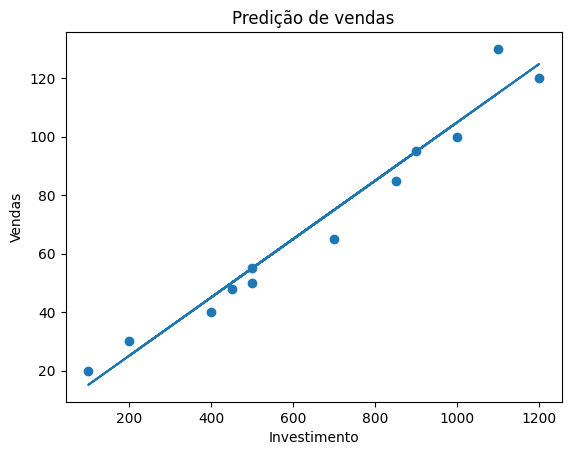

In [134]:
import matplotlib.pyplot as plt
plt.scatter(df['Investimento'], df['Vendas'])
plt.plot(df['Investimento'], modelo.predict(df[['Investimento']]))
plt.xlabel('Investimento')
plt.ylabel('Vendas')
plt.title('Predição de vendas')
plt.show()